In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph, END, START, add_messages
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, BaseMessage

In [6]:
load_dotenv()
llm = ChatGoogleGenerativeAI(model="gemini-2.5-pro")

In [20]:
class ChatbotState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [21]:
def chatnode(state: ChatbotState):

    messages = state["messages"]
    response = llm.invoke(messages)
    return {"messages": [response]}

In [22]:
graph = StateGraph(ChatbotState)

graph.add_node("chatnode",chatnode)

graph.add_edge(START, "chatnode")
graph.add_edge("chatnode",END)

workflow = graph.compile()

In [ ]:
msg = {"messages": "hii, how are you?"}
workflow.invoke(msg)["messages"][-1]

InvalidUpdateError: Expected dict, got ?
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

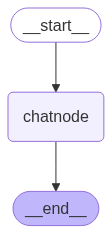

In [11]:
workflow